In [58]:
from tallem import TALLEM
from tallem.dimred import *
from tallem.cover import *
from tallem.datasets import *

## Get mobius band example
X, B = mobius_band()
polar_coordinate = B[:,[1]]

## Run TALLEM on interval cover using polar coordinate information
cover = CircleCover(polar_coordinate, n_sets=15, scale=1.50)
top = TALLEM(cover, local_map="pca3", D=3)
emb = top.fit_transform(X, fit="best", scale=True)

top.plot_nerve(edge_color="translation")

Loading BokehJS ...

In [54]:
taus = top.translations
d = len(taus[0])
translation_error = {}
for (j,k) in top.alignments.keys():
	omega_jk = top.alignments[(j,k)]['rotation']	
	# tau_j, tau_k = taus[j].reshape((d, 1)), taus[k].reshape((d, 1))
	# translation_error[(j,k)] = np.linalg.norm((omega_jk @ tau_k) - tau_j - top.alignments[(j,k)]['translation'])**2
	tau_j, tau_k = taus[j].reshape((d, 1)), taus[k].reshape((d, 1))
	tau_jk = top.alignments[(j,k)]['translation']
	tau_jk_approx = (omega_jk @ tau_j) - tau_k
	tau_size_diff = np.linalg.norm(tau_jk_approx)/np.linalg.norm(tau_jk)
	translation_error[(j,k)] = np.linalg.norm(tau_jk_approx - tau_jk)*tau_size_diff



In [55]:
translation_error

{(0, 1): 1.1637864341931423e-14,
 (0, 14): 1.0185540470688835e-14,
 (1, 2): 3.773102058042861e-15,
 (2, 3): 3.142259322955114e-15,
 (3, 4): 1.1457865614384006e-14,
 (4, 5): 2.9977315573371476e-14,
 (5, 6): 2.6709880040507897e-15,
 (6, 7): 2.385752423736688e-14,
 (7, 8): 1.2270541866253163e-14,
 (8, 9): 1.9660064329617552e-14,
 (9, 10): 6.510189248147682e-15,
 (10, 11): 2.7519094685684177e-15,
 (11, 12): 2.687991779132499e-15,
 (12, 13): 6.989567123314787e-15,
 (13, 14): 1.3433839679865861e-14}

In [43]:
print(top.translations[0])
print(np.linalg.norm(top.translations[0]))
print(top.translations[1])
print(np.linalg.norm(top.translations[1]))
print(top.alignments[(0,1)]['translation'])
print(np.linalg.norm(top.alignments[(0,1)]['translation']))

[-0.23409823  0.4590269   0.02502656]
0.5158817727581639
[-0.39742257  0.3276297  -0.02912181]
0.5158817727581634
[-1.38777878e-16 -2.22044605e-16 -3.05311332e-16]
4.0221650305342743e-16


In [44]:
top.alignments

{(0,
  1): {'rotation': array([[ 0.91482919, -0.40157228,  0.04274646],
         [ 0.38410396,  0.89791674,  0.21496436],
         [-0.12470649, -0.18023658,  0.97568595]]), 'scaling': 0.9999999999999993, 'translation': array([-1.38777878e-16, -2.22044605e-16, -3.05311332e-16]), 'distance': 6.661338147750939e-16},
 (0,
  14): {'rotation': array([[-0.88887655, -0.45468125,  0.05624449],
         [ 0.45636119, -0.86788648,  0.19623333],
         [-0.04040978,  0.20009501,  0.97894282]]), 'scaling': 0.9999999999999998, 'translation': array([-3.60822483e-16, -4.44089210e-16, -1.11022302e-16]), 'distance': 0.0},
 (1,
  2): {'rotation': array([[ 0.90139683, -0.41719266,  0.1159053 ],
         [ 0.38436256,  0.8942117 ,  0.22945774],
         [ 0.19937196,  0.16228283, -0.96639283]]), 'scaling': 0.9999999999999999, 'translation': array([ 9.15933995e-16, -1.11022302e-16,  0.00000000e+00]), 'distance': 4.440892098500626e-16},
 (2,
  3): {'rotation': array([[ 0.93217274, -0.29848207, -0.20484733

(<Figure size 360x360 with 1 Axes>, <Axes3DSubplot:>)

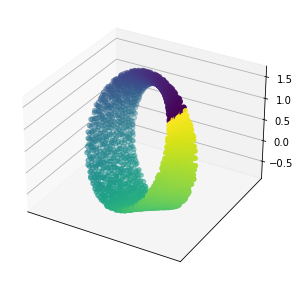

In [22]:
%matplotlib inline
scatter3D(emb, c=polar_coordinate, figsize=(5,5))

In [29]:
%matplotlib notebook
scatter3D(emb, c=polar_coordinate)

<IPython.core.display.Javascript object>

(<Figure size 576x576 with 1 Axes>, <Axes3DSubplot:>)

(<Figure size 864x288 with 16 Axes>, <Axes3DSubplot:>)

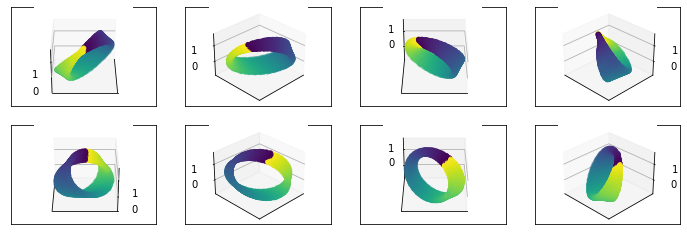

In [27]:
## Rotate and view
%matplotlib inline
angles = np.linspace(0, 360, num=8, endpoint=False)
scatter3D(emb, angles=angles, figsize=(12, 4), layout=(2,4), c=polar_coordinate)